Choosing a college to attend is one of the most important decision one can make. What measures the success of a college degree? It can be either the height of the societal ladder that you can climb, or how much content you are with your life. For the sake of this project, we are measuring a quantitative variable: Salary.

The college in exploration are divided based on 3 categories:
- Colleges by Type
- Colleges by Region
- Salary by major 

The dataset is from The Wall Street Journal, available on Kaggle at: https://www.kaggle.com/wsj/college-salaries

First, let's import some library we will use later 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Let's load our first dataset: Colleges by Type 

In [2]:
college_type = pd.read_csv("salaries-by-college-type.csv")
college_region = pd.read_csv("salaries-by-region.csv")

Take a peek at our data

In [3]:
college_type.head(5)

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [4]:
college_region.head(5)

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


Notice that the salary collumn is identical, let's combine these 2 dataset so we can have both location and school type for each college

In [5]:
df = pd.merge(college_type, college_region)

In [6]:
df.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Region
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00",Northeastern
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,California
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,California
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00",Northeastern
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN,Northeastern


Ah, the region is there but it's at the last collumn, which is not visible much. Let's move it to the second collumn

In [7]:
region = df.pop("Region")
df.insert(1, 'Region', region)

In [8]:
df.head()

,School Name,Region,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),California,Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Northeastern,Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Northeastern,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


Nice! Now let's take a quick look overview of our data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 9 columns):
School Name                          260 non-null object
Region                               260 non-null object
School Type                          260 non-null object
Starting Median Salary               260 non-null object
Mid-Career Median Salary             260 non-null object
Mid-Career 10th Percentile Salary    223 non-null object
Mid-Career 25th Percentile Salary    260 non-null object
Mid-Career 75th Percentile Salary    260 non-null object
Mid-Career 90th Percentile Salary    223 non-null object
dtypes: object(9)
memory usage: 20.3+ KB


In [10]:
df.describe()

,School Name,Region,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,260,260,260,260,260,223,260,260,223
unique,240,5,5,142,162,135,172,106,95
top,Arizona State University (ASU),Northeastern,State,"$42,600.00","$72,100.00","$40,100.00","$54,100.00","$106,000.00","$150,000.00"
freq,2,69,169,7,5,6,6,10,8


Notice that all the variables are object type. Let's change School Name, Region, School Type to string, and the rest to numeric values

Before we change it to numeric values, we need to drop the "$" sign before the value 

In [11]:
# Remove the dollar $ sign
colstocheck = df.columns
df[colstocheck] = df[colstocheck].replace({'\$': '', ',': ''}, regex = True)


In [12]:
to_change = ["Starting Median Salary", "Mid-Career Median Salary", "Mid-Career 10th Percentile Salary", "Mid-Career 25th Percentile Salary", "Mid-Career 75th Percentile Salary", "Mid-Career 90th Percentile Salary"]
for i in to_change:
    df[i] = df[i].astype(float)

In [13]:
df.head()

,School Name,Region,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),California,Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,Polytechnic University of New York Brooklyn,Northeastern,Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Northeastern,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 9 columns):
School Name                          260 non-null object
Region                               260 non-null object
School Type                          260 non-null object
Starting Median Salary               260 non-null float64
Mid-Career Median Salary             260 non-null float64
Mid-Career 10th Percentile Salary    223 non-null float64
Mid-Career 25th Percentile Salary    260 non-null float64
Mid-Career 75th Percentile Salary    260 non-null float64
Mid-Career 90th Percentile Salary    223 non-null float64
dtypes: float64(6), object(3)
memory usage: 20.3+ KB


In [15]:
# Check missing values 

df.isnull().sum()

School Name                           0
Region                                0
School Type                           0
Starting Median Salary                0
Mid-Career Median Salary              0
Mid-Career 10th Percentile Salary    37
Mid-Career 25th Percentile Salary     0
Mid-Career 75th Percentile Salary     0
Mid-Career 90th Percentile Salary    37
dtype: int64

In [16]:
# There are missing values in 2 columns. The total missing values we have is: 

df.isnull().sum().sum()

74

Great! Looks like we have pretty much done with the pre-processing data. Now the last step would be to process the missing values.

There are several ways to handle missing data:
1. Delete the entire rows which have the missing values. This is the simplest, but not ideal because the more data we have for this project, the better! There are 15% of the data go missing in this dataset. 
2. Fill in the missing values with the mean, median, or mode of the same type of variable. Let's go with this option

Actually after doing some research, there are 6 ways to handle this! You can check them out here: https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

In [17]:
df["Mid-Career 10th Percentile Salary"].fillna(df["Mid-Career 10th Percentile Salary"].mean(), inplace=True)

In [18]:
df["Mid-Career 90th Percentile Salary"].fillna(df["Mid-Career 90th Percentile Salary"].mean(), inplace=True)

In [19]:
# Let's check the missing values again 

df.isnull().sum()

School Name                          0
Region                               0
School Type                          0
Starting Median Salary               0
Mid-Career Median Salary             0
Mid-Career 10th Percentile Salary    0
Mid-Career 25th Percentile Salary    0
Mid-Career 75th Percentile Salary    0
Mid-Career 90th Percentile Salary    0
dtype: int64

Okay let's look at our variable again

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 9 columns):
School Name                          260 non-null object
Region                               260 non-null object
School Type                          260 non-null object
Starting Median Salary               260 non-null float64
Mid-Career Median Salary             260 non-null float64
Mid-Career 10th Percentile Salary    260 non-null float64
Mid-Career 25th Percentile Salary    260 non-null float64
Mid-Career 75th Percentile Salary    260 non-null float64
Mid-Career 90th Percentile Salary    260 non-null float64
dtypes: float64(6), object(3)
memory usage: 20.3+ KB


- 3 categorical variables: School Name, Region, School Type
- 6 coninuous variables of different types of Salary 

In [21]:
# Grouping the data by region and school type to visualize data

group_by_region = df.groupby("Region")
group_by_type = df.groupby("School Type")


In [22]:
group_by_region.nunique()

,School Name,Region,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
Region,,,,,,,,,
California,25,1,4,25,22,20,24,23,18
Midwestern,58,1,4,48,53,45,54,40,38
Northeastern,66,1,5,63,57,46,62,48,44
Southern,56,1,4,46,51,46,52,38,41
Western,35,1,4,32,32,29,33,24,28


In [23]:
group_by_type.nunique()

,School Name,Region,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
School Type,,,,,,,,,
Engineering,18,5,1,18,14,15,17,16,15
Ivy League,8,1,1,8,8,8,8,8,8
Liberal Arts,45,5,1,42,38,14,43,33,14
Party,20,5,1,20,19,20,19,14,19
State,169,5,1,104,125,106,126,76,73


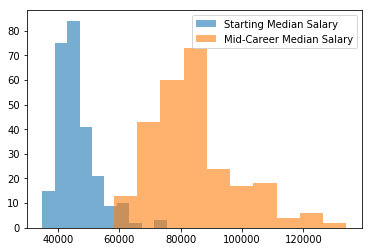

In [24]:
# Plot a histogram
x_starting = df["Starting Median Salary"]
y_mid_career = df["Mid-Career Median Salary"]
plt.hist(x_starting, alpha = 0.6, label = "Starting Median Salary")
plt.hist(y_mid_career, alpha = 0.6, label = "Mid-Career Median Salary")
plt.legend(loc = "upper right")
plt.show()

Text(0,0.5,'Mid-Career Median Salary')

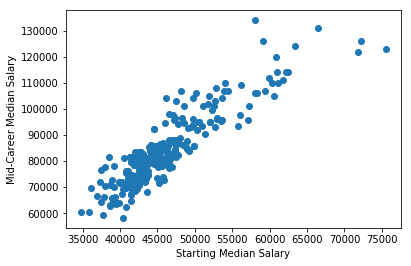

In [25]:
# Any correlation between starting and mid-career salaries? 
plt.scatter(x_starting, y_mid_career)
plt.xlabel("Starting Median Salary")
plt.ylabel("Mid-Career Median Salary")

Looks like there's a correlation between Starting Median Salary and Mid-Career Median Salary! It means the longer you work, the higher you would earn!

In [26]:
# Let's check its Pearson's r 
np.corrcoef(x_starting, y_mid_career)[0, 1]

0.900921736756747

0.9 is pretty high! It means the 90% of the variation in the mid career salary can be explained by the starting salary! 

Let's visualize the data based on regions and school type 

In [27]:
import seaborn as sns

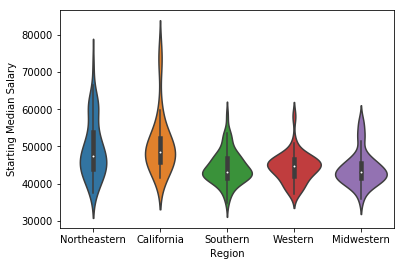

In [28]:
sns.violinplot(x="Region", y="Starting Median Salary", data=df)

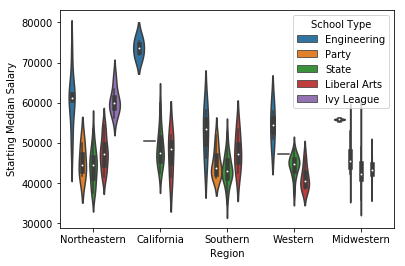

In [29]:
sns.violinplot(x="Region", y="Starting Median Salary", hue = "School Type", data=df)

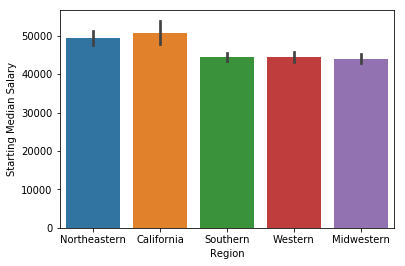

In [30]:
sns.barplot(x="Region", y="Starting Median Salary", data=df)

Seeems like schools in Northeastern and California always hit the top bar of salary. Also Engineering schools seem to earn the most

Want to do more? Here are a few ideas to expore:
- What is the question we're trying to answer? Find the appropriate dependent and independent variables for that
- Hypothesis testing to check that question 
- Visualize different types of plot! 